In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-swing-on-strike.csv")

df0 = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# select season (zero indexed)
season = 13
df0 = df0[df0["season"] == season]

len(df0)

88456

In [2]:
def calc_vibes(df, prefix):
    buoy = df[prefix + "_buoyancy"]  # * df[prefix + "_mul"]
    press = df[prefix + "_pressurization"]  # * df[prefix + "_mul"]
    cinn = df[prefix + "_cinnamon"]  # * df[prefix + "_mul"]

    freq = 6 + (buoy * 10).round()
    phase = math.pi * ((2 / freq) * dfc["day"] + 0.5)
    vibes = 0.5 * (press + cinn) * np.sin(phase) - (0.5 * press) + (0.5 * cinn)
    return vibes


def get_pitcher_mul(row):
    pm = str(row["pitcher_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in pm:
        mul += 0.2
    if "OVERPERFORMING" in ptm:
        mul += 0.2
    if "UNDERPERFORMING" in pm:
        mul -= 0.2
    if "UNDERPERFORMING" in ptm:
        mul -= 0.2
    if "TRAVELING" in ptm:
        pass  # traveling just doesn't do anything on pitchers?
    #         if not row["top_of_inning"]:
    #             mul += 0.05
    if "HIGH_PRESSURE" in ptm:
        # i messed up baserunner_count lol, so it's a string
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "GROWTH" in ptm:
        #         mul += min(0.05, 0.05 * (row["day"] / 99))
        pass  # growth doesn't do anything on pitchers either
    if "SINKING_SHIP" in ptm:
        mul += (14 - row["pitching_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in ptm and row["weather"] == 11:
        mul += 0.5
    return mul


def get_batter_mul(row):
    bm = str(row["batter_mods"])
    btm = str(row["batting_team_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in bm:
        mul += 0.2
    if "OVERPERFORMING" in btm:
        mul += 0.2
    if "UNDERPERFORMING" in bm:
        mul -= 0.2
    if "UNDERPERFORMING" in btm:
        mul -= 0.2
    if "TRAVELING" in btm:
        if row["top_of_inning"]:
            # this doesn't seem to do anything if it's here or not here
            mul += 0.05
    #             pass
    if "GROWTH" in btm:
        mul += min(0.05, 0.05 * (row["day"] / 99))
    #         pass
    if "HIGH_PRESSURE" in btm:
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "SINKING_SHIP" in btm:
        mul += (14 - row["batting_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in btm and row["weather"] == 11:
        mul += 0.5
    if "CHUNKY" in bm:
        # todo: handle, in peanuts weather
        pass
    if "SMOOTH" in bm:
        # todo: handle, in peanuts weather
        pass
    if "ON_FIRE" in bm:
        # todo: handle
        # test "+125% multiplier"
        mul += 1.25
        pass
    return mul

In [3]:
df = df0.copy()
df["batter_mul"] = df.apply(get_batter_mul, axis=1)
df["pitcher_mul"] = df.apply(get_pitcher_mul, axis=1)

# for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
#     df[attr] = df[attr] * df['batter_mul']
# for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
#     df[attr] = df[attr] * df['pitcher_mul']

# removed path and tragicness from this, because they're inverse attrs and need to be flipped first
#     if attr in ['batter_divinity', 'batter_musclitude', 'batter_groundfriction']:
#         df[df["batter_mods"].astype(str).str.contains("CHUNKY")][attr] = df[attr] * (df['batter_mul'] + 1.0)
#         df[~df["batter_mods"].astype(str).str.contains("CHUNKY")][attr] = df[attr] * df['batter_mul']
#     else:
for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_thwackability",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_mul"]
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_thwackability",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_mul"]

df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0

df["pitcher_ruth_with_vibe"] = df["pitcher_ruthlessness"] * (1 + 0.2 * df["pitcher_vibes"])
df["batter_moxie_with_vibe"] = df["batter_moxie"] * (1 + 0.2 * df["batter_vibes"])
df["batter_musc_with_vibe"] = df["batter_musclitude"] * (1 + 0.2 * df["batter_vibes"])
df["batter_thwack_with_vibe"] = df["batter_thwackability"] * (1 + 0.2 * df["batter_vibes"])
df["batter_div_with_vibe"] = df["batter_divinity"] * (1 + 0.2 * df["batter_vibes"])

df["ruth_times_vibe"] = df["pitcher_ruthlessness"] * df["pitcher_vibes"]
df["moxie_times_vibe"] = df["batter_moxie"] * df["batter_vibes"]
df["path_times_vibe"] = df["batter_patheticism"] * df["batter_vibes"]
df["thwack_times_vibe"] = df["batter_thwackability"] * df["batter_vibes"]
df["musc_times_vibe"] = df["batter_musclitude"] * df["batter_vibes"]
df["div_times_vibe"] = df["batter_divinity"] * df["batter_vibes"]
df["filth_times_visc"] = df["ballpark_filthiness"] * df["ballpark_viscosity"]


df["invpath"] = 1 - df["batter_patheticism"] / df["batter_mul"]
df["invpath_mul"] = df["invpath"]  # / df['batter_mul']
df["invpath_with_vibe"] = df["invpath_mul"] * (1 + 0.2 * df["batter_vibes"])
df["combined_batting"] = 0.25 * (
    df["batter_div_with_vibe"] + df["batter_musc_with_vibe"] + df["invpath_with_vibe"] + df["batter_thwack_with_vibe"]
)

# 'batter_div_with_vibe', 'batter_musc_with_vibe', 'invpath_with_vibe', 'batter_thwack_with_vibe',
#         'pitcher_ruth_with_vibe', 'ballpark_viscosity'


# df[df["pitcher_mul"] != 1][["pitcher_mul", "pitcher_mods", "pitching_team_mods"]].drop_duplicates()

In [4]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
# for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING", "CHUNKY", "SMOOTH"]:
for exclude_mod in ["O_NO", "ON_FIRE", "CHUNKY", "SMOOTH"]:
    # for exclude_mod in ["O_NO", "CHUNKY", "SMOOTH"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.95]
# dfc = dfc[dfc['roll'] > 0.1]
# dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# dfc = dfc[dfc['batter_patheticism'] > 0.1]

len(dfc)

78720

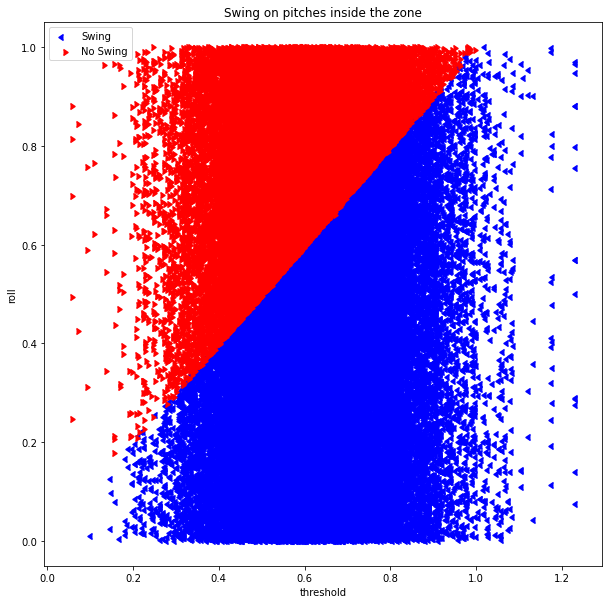

In [5]:
# dfc["threshold"] = -1*(\
#     intercept_scaled + \
#     coef_scaled[0,1] * dfc["combined_batting"] + \
#     coef_scaled[0,2] * dfc["pitcher_ruth_with_vibe"] + \
#     coef_scaled[0,3] * dfc["ballpark_viscosity"])


dfc["threshold"] = -1 * (
    -0.60 + -0.35 * dfc["combined_batting"] + 0.40 * dfc["pitcher_ruth_with_vibe"] + -0.20 * dfc["ballpark_viscosity"]
)

# [(1.0, 'roll'),
#  (0.3998948107488037, 'pitcher_ruth_with_vibe'),
#  (-0.3493653911192097, 'combined_batting'),
#  (-0.19858215226781548, 'ballpark_viscosity')]
# array([-0.6006551])


x_val = "threshold"
# x_val = "invpath_with_vibe"
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll"],
    color="blue",
    label="Swing",
    marker=CARETLEFTBASE,
)
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll"],
    color="red",
    label="No Swing",
    marker=CARETRIGHTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title("Swing on pitches inside the zone")
# ax.set_xlim(0.484, 0.499)

ax.legend()

9


,event_type,offset,roll,threshold,pitcher_mul,batter_mul,baserunner_count,pitcher_ruth_with_vibe,invpath_with_vibe,ballpark_viscosity,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
4836,Foul,0.003028,0.675836,0.672807,1.0,1.010000,[],0.567456,0.509709,0.598693,Sutton Dreamy,Bontgomery Mullock,FLINCH,FRIEND_OF_CROWS;WILD,SINKING_SHIP,LOVE,32,c12283a7-e706-4b28-83e0-e55cd04da34d,121
70991,StrikeLooking,-0.000365,0.939299,0.939664,1.0,1.006566,[],0.337702,0.637194,0.263230,Margarito Nava,Enid Marlow,FIRE_EATER,NaN,GROWTH,BOTTOM_DWELLER,13,e3d93acf-6d9a-41dd-94de-74ba630abdf6,7
50841,StrikeLooking,-0.000443,0.494303,0.494747,1.0,1.050000,[],1.051802,0.416270,0.342355,Alx Keming,Jacoby Podcast,NaN,NaN,TRAVELING;PARTY_TIME,CARCINIZATION;UNHOLEY;PARTY_TIME,93,0e385bd0-b088-40f2-8607-0da368ee60b7,69
69574,StrikeLooking,-0.000591,0.570231,0.570822,1.0,1.050000,"['070758a0-092a-4a2c-8a16-253c835887cb', '4ca5...",0.982044,0.769236,0.276975,Simon Haley,Shirai McElroy,FLINCH,NaN,TRAVELING,MAINTENANCE_MODE,12,d34dd161-9906-40b2-bf18-af8d6ff1de49,16
10394,StrikeLooking,-0.000685,0.757448,0.758133,1.0,1.018182,[],0.887259,1.123791,0.400827,Hiroto Cerna,Sosa Hayes,NaN,NaN,GROWTH,NaN,36,4b84b94a-696a-40ca-9e90-7169f52f60f3,112
70899,StrikeLooking,-0.000877,0.676102,0.676979,1.0,1.050000,[],0.982044,0.922948,0.276975,Howell Franklin,Shirai McElroy,FLINCH,NaN,TRAVELING,MAINTENANCE_MODE,12,d34dd161-9906-40b2-bf18-af8d6ff1de49,311
55447,StrikeLooking,-0.002890,0.516981,0.519871,1.0,1.050000,[],1.097545,1.023613,0.548732,Herring Winfield,Greer Lott,NaN,NaN,TRAVELING;PARTY_TIME,HIGH_PRESSURE,96,0b4a26a8-46d3-4d2c-a6eb-5e1d3682f1df,126
53490,StrikeLooking,-0.003454,0.787229,0.790683,1.0,1.047980,[],0.756161,0.611366,0.432771,Margarito Nava,Alexandria Rosales,FIRE_EATER;COFFEE_RALLY,NaN,GROWTH,NaN,95,86c2f705-1432-4014-95b9-36a346552ee3,11
44712,StrikeLooking,-0.004485,0.660718,0.665203,1.0,1.044949,['718dea1a-d9a8-4c2b-933a-f0667b5250e6'],0.753206,0.699547,0.400827,Lenny Spruce,Miguel James,NaN,NaN,GROWTH,BASE_INSTINCTS,89,0fa9f225-3e04-429b-97fb-8cb21c739a3b,33


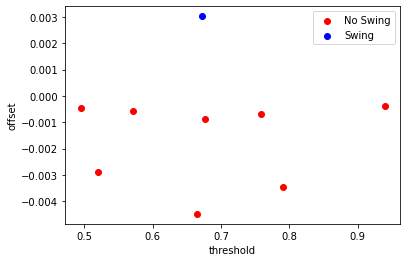

In [6]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "threshold"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="No Swing",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Swing",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

table = outliers
print(len(table))
table = table[
    [
        "event_type",
        "offset",  # "home_score", "away_score", "top_of_inning", "inning",
        "roll",
        "threshold",
        "pitcher_mul",
        "batter_mul",
        "baserunner_count",
        #        "batter_vibes", "pitcher_vibes",
        "pitcher_ruth_with_vibe",
        "invpath_with_vibe",
        "ballpark_viscosity",  # "batter_musclitude", "batter_divinity", "batter_thwackability", "batter_patheticism",
        "batter_name",
        "pitcher_name",
        "batter_mods",
        "pitcher_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "day",
        "game_id",
        "play_count",
    ]
].sort_values("offset", ascending=False)
# len(table)
# print(table['offset']/table['threshold'])
table

In [7]:
45416, 23524, 4836
out1 = dfc.loc[
    4836,
    [
        "event_type",
        "offset",
        "home_score",
        "away_score",
        "top_of_inning",
        "inning",
        "roll",
        "threshold",
        "pitcher_mul",
        "batter_mul",
        "baserunner_count",
        "batter_vibes",
        "pitcher_vibes",
        "pitcher_ruth_with_vibe",
        "invpath_with_vibe",
        "ballpark_viscosity",
        "batter_musclitude",
        "batter_divinity",
        "batter_thwackability",
        "batter_patheticism",
        "combined_batting",
        "batter_name",
        "pitcher_name",
        "batter_mods",
        "pitcher_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "day",
        "weather",
        "game_id",
        "play_count",
    ],
]
out1

event_type                                                Foul
offset                                                0.003028
home_score                                                 0.0
away_score                                                 2.0
top_of_inning                                             True
inning                                                       3
roll                                                  0.675836
threshold                                             0.672807
pitcher_mul                                                1.0
batter_mul                                                1.01
baserunner_count                                            []
batter_vibes                                          0.092788
pitcher_vibes                                        -0.332547
pitcher_ruth_with_vibe                                0.567456
invpath_with_vibe                                     0.509709
ballpark_viscosity                                    0

In [8]:
# dfc["threshold"] = -1*(\
#     -0.60 + \
#     -0.35 * dfc["combined_batting"] + \
#     0.40 * dfc["pitcher_ruth_with_vibe"] + \
#     -0.20 * dfc["ballpark_viscosity"])
musc0 = out1["batter_musclitude"] / out1["batter_mul"]
div0 = out1["batter_divinity"] / out1["batter_mul"]
thwack0 = out1["batter_thwackability"] / out1["batter_mul"]
path0 = out1["batter_patheticism"]

(
    0.60
    + 0.20 * out1["ballpark_viscosity"]
    - 0.40 * out1["pitcher_ruth_with_vibe"]
    + 0.35 * 0.25 * (1 + 0.2 * out1["batter_vibes"]) * (musc0 + div0 + thwack0 + (1 - path0))
)

0.6710211337782895

In [9]:
print(out1["roll"])
print(out1["threshold"])

0.6758358453104629
0.6728074836625163


In [10]:
0.60 + 0.20 * out1["ballpark_viscosity"] - 0.40 * out1["pitcher_ruth_with_vibe"]

0.4927561016596911

In [11]:
multest = 1.03
print(
    "batting term:",
    0.35
    * 0.25
    * (1 + 0.2 * out1["batter_vibes"])
    * (musc0 * multest + div0 * multest + thwack0 * multest + (1 - path0 / multest)),
)
print(
    "threshold:   ",
    0.60
    + 0.20 * out1["ballpark_viscosity"]
    - 0.40 * out1["pitcher_ruth_with_vibe"]
    + 0.35
    * 0.25
    * (1 + 0.2 * out1["batter_vibes"])
    * (musc0 * multest + div0 * multest + thwack0 * multest + (1 - path0 / multest)),
)
print("roll:        ", out1["roll"])

batting term: 0.18359814531342603
threshold:    0.6763542469731171
roll:         0.6758358453104629


In [12]:
out1["combined_batting"]

0.5144325200080723

In [13]:
table.groupby("pitching_team_mods").size()

pitching_team_mods
BASE_INSTINCTS                      1
BOTTOM_DWELLER                      1
CARCINIZATION;UNHOLEY;PARTY_TIME    1
HIGH_PRESSURE                       1
LOVE                                1
MAINTENANCE_MODE                    2
dtype: int64

In [14]:
table.groupby("batting_team_mods").size()

batting_team_mods
GROWTH                  4
SINKING_SHIP            1
TRAVELING               2
TRAVELING;PARTY_TIME    2
dtype: int64

In [15]:
table.groupby("batter_mods").size()

batter_mods
FIRE_EATER                 1
FIRE_EATER;COFFEE_RALLY    1
FLINCH                     3
dtype: int64

In [16]:
table.groupby("pitcher_mods").size()

pitcher_mods
FRIEND_OF_CROWS;WILD    1
dtype: int64

In [17]:
# X = dfc[['roll', 'passed',
#         'batter_div_with_vibe', 'batter_musc_with_vibe', 'batter_patheticism', 'batter_thwack_with_vibe',
#         'pitcher_ruth_with_vibe', 'ballpark_viscosity']]
# X = dfc[['roll', 'passed',
#         'batter_div_with_vibe', 'batter_musc_with_vibe', 'invpath_with_vibe', 'batter_thwack_with_vibe',
#         'pitcher_ruth_with_vibe', 'ballpark_viscosity']]
X = dfc[
    [
        "roll",
        "passed",
        "combined_batting",
        "pitcher_ruth_with_vibe",
        "ballpark_viscosity",
    ]
]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X["passed"]
X = X.drop("passed", axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=10000, tol=1e-6).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))

[[30239    10]
 [   12 48459]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     30249
        True       1.00      1.00      1.00     48471

    accuracy                           1.00     78720
   macro avg       1.00      1.00      1.00     78720
weighted avg       1.00      1.00      1.00     78720



In [19]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (0.40006910822141284, 'pitcher_ruth_with_vibe'),
 (-0.3494761289436591, 'combined_batting'),
 (-0.19987050968218545, 'ballpark_viscosity')]

In [20]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.60036173])

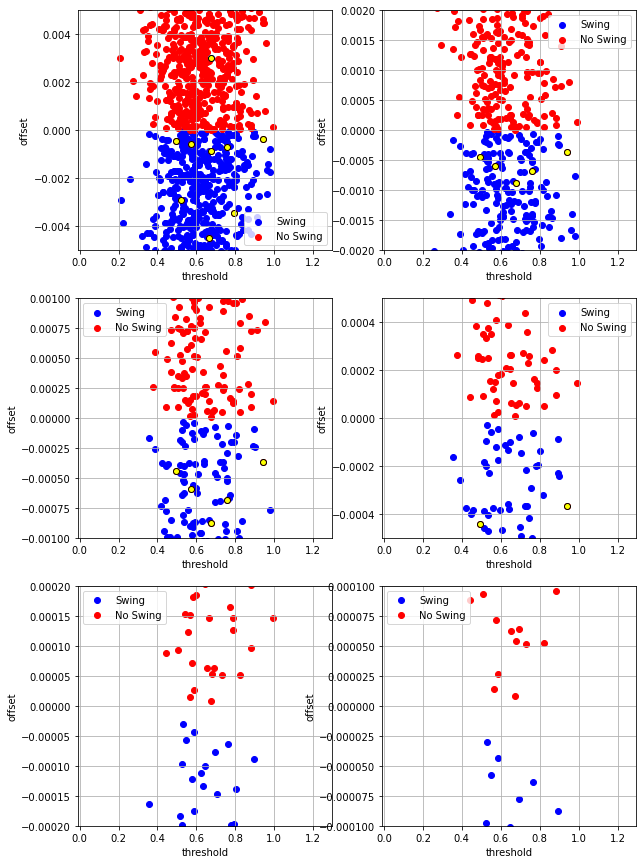

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
dimlist = [5e-3, 2e-3, 1e-3, 0.5e-3, 0.2e-3, 0.1e-3]
for i, ax in enumerate(np.ravel(axes)):
    ax.scatter(
        dfc[dfc["passed"]][x_val],
        dfc[dfc["passed"]]["offset"],
        color="blue",
        label="Swing",
    )
    ax.scatter(
        dfc[~dfc["passed"]][x_val],
        dfc[~dfc["passed"]]["offset"],
        color="red",
        label="No Swing",
    )
    ax.scatter(
        outliers[~outliers["passed"]][x_val],
        outliers[~outliers["passed"]]["offset"],
        color="yellow",
        edgecolor="black",
    )
    ax.scatter(
        outliers[outliers["passed"]][x_val],
        outliers[outliers["passed"]]["offset"],
        color="yellow",
        edgecolor="black",
    )
    ax.set_xlabel(x_val)
    ax.set_ylabel("offset")
    ax.legend()
    # ax.set_yscale("log")
    ax.grid()
    ax.set_ylim(-dimlist[i], dimlist[i])
# fig.savefig("swing_strike_fit_offsets.png", facecolor='white')

In [22]:
# list(df.columns)